# Solución:

**A:**


In [1]:
import pandas as pd

In [4]:
ds=pd.read_json("https://github.com/restrepo/anomaly/raw/main/solutions.json.gz")
ds

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


**1.** Añadimos la nueva columna `smax`:

In [8]:
ds["smax"]=ds["solution"].apply(lambda l: max(map(abs,l)))
ds

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8
...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31


**2.** Añadimos las dos columnas sum_s y sum_s$^{3}$:

In [10]:
ds["sum_s"]=ds["solution"].apply(lambda l: sum(l))
ds["sum_s^{3}"]=ds["solution"].apply(lambda l: sum(l)**3)
ds

,l,k,solution,gcd,n,smax,sum_s,sum_s^{3}
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0
...,...,...,...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8,32,0,0
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8,28,0,0
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8,32,0,0
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8,31,0,0


**3.** Generamos el número aleatorio:

In [11]:
import numpy as np

In [13]:
np.random.seed(1000565036)
np.random.randint(0, 390073)

54669

Filtramos la fila:


In [93]:
coef=ds["solution"][54669]
coef

[3, -5, -13, 14, -19, 22, 24, -25, 28, -29]

Generamos el polinomio:

In [136]:
p=np.poly1d(coef)
print(p)

   9     8      7      6      5      4      3      2
3 x - 5 x - 13 x + 14 x - 19 x + 22 x + 24 x - 25 x + 28 x - 29


Hallamos sus raíces:

In [137]:
r=p.roots
r

array([-2.11246056+0.j        ,  2.76254745+0.j        ,
       -1.18857936+0.j        ,  1.14879652+0.j        ,
        1.        +0.j        , -0.03907592+1.0395474j ,
       -0.03907592-1.0395474j ,  0.06725723+1.05663411j,
        0.06725723-1.05663411j])

Filtramos las raíces reales:

In [233]:
real=(r[np.isreal(r)])
real

array([-2.11246056+0.j,  2.76254745+0.j, -1.18857936+0.j,  1.14879652+0.j,
        1.        +0.j])

Hallamos su derivada:

In [139]:
dp=p.deriv()
print(dp)

    8      7      6      5      4      3      2
27 x - 40 x - 91 x + 84 x - 95 x + 88 x + 72 x - 50 x + 28


Realizamos la gráfica:

In [140]:
import matplotlib.pyplot as plt

C:\Users\juang\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show(*args, **kw)>

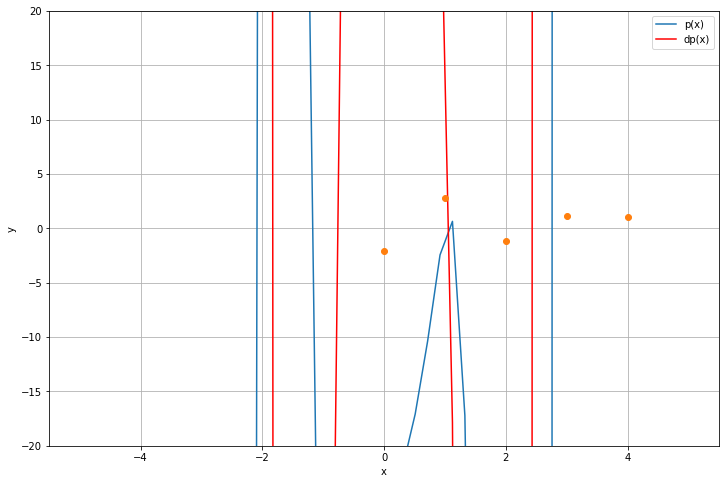

In [234]:
p=np.poly1d(coef)
x = np.linspace(-5,5,50)

plt.figure(figsize=(12,8))
plt.plot(x,p(x),label="p(x)")
plt.legend()
plt.plot(x,dp(x),"r",label="dp(x)")
plt.legend()
plt.plot(real,"o")
plt.ylim(-20,20)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.show

**NOTA**: No logro entender qué estoy haciendo mal dado que no se muestran las raíces correctamente en la gráfica.

**B.**

In [207]:
np.random.seed(1000565036)
np.random.randint(1,5)

2

$-p=\frac{\sin(x)}{x}$

In [208]:
np.random.seed(1000565036)
p=np.random.random()
p

0.9387334322012377

In [209]:
def f(x):
    return (np.sin(x))/x

In [210]:
from scipy import optimize

In [215]:
optimize.newton(f,-p)

-3.141592653589793

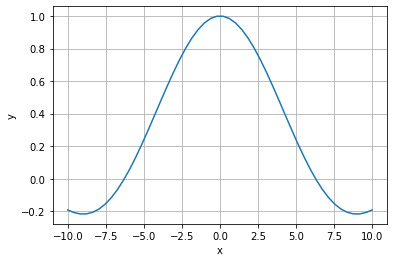

In [204]:
X=np.linspace(-10,10)
y=f(x)

plt.plot(X,y)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")

plt.show()